In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Path to results

path = os.path.join(os.path.dirname(os.getcwd()), 'src\rfesults')

In [3]:
op_ar = [1, 1.01, 1.025]
if_ar = [0, 0.25, 1]

In [4]:
def df_creator(op_factor, imp_flex, dis):
    dimp = pd.read_excel(os.path.join(path, f'Dimp3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0,1,2], header = [0])
    grouped_df = dimp.groupby(level=['Index1', 'Index2']).sum()
    pivoted_df = grouped_df.unstack(level='Index2') / 365
    pivoted_df.columns = pivoted_df.columns.droplevel(0)
    return pivoted_df

In [5]:
rigid = df_creator(1,0, 0.1)
moderate = df_creator(1.01,0.25, 0.1)
flexible = df_creator(1.025,1, 0.1)

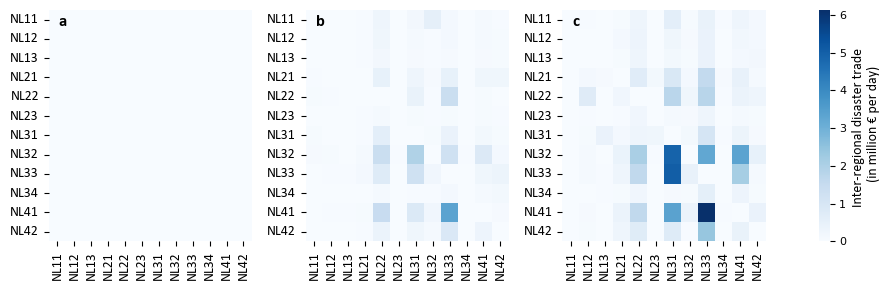

In [11]:
# Fontname and size
font = 'Calibri'
size_font = 10


fig, ax = plt.subplots(1, 4, figsize=(9, 3), gridspec_kw={'width_ratios': [2, 2, 2, 0.1]})
label_posx = 0.05
label_posy = 0.98
ax1 = ax[0]
# Normalize color scale across all heatmaps
vmin = min(rigid.min().min(), moderate.min().min(), flexible.min().min())
vmax = max(rigid.max().max(), moderate.max().max(), flexible.max().max())
h1 = sns.heatmap(rigid, ax=ax1, vmin=vmin, vmax=vmax, cmap="Blues", cbar=False)
ax1.set_xlabel('')  
ax1.set_ylabel('')
ax1.set_xticklabels(labels = rigid.columns, fontsize=size_font, fontname=font)
ax1.set_yticklabels(labels = rigid.index, fontsize=size_font, fontname=font)
ax1.text(label_posx, label_posy , 'a', transform=ax1.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


ax2 = ax[1]
# Normalize color scale across all heatmaps
vmin = min(rigid.min().min(), moderate.min().min(), flexible.min().min())
vmax = max(rigid.max().max(), moderate.max().max(), flexible.max().max())
h2 = sns.heatmap(moderate, ax=ax2, vmin=vmin, vmax=vmax, cmap="Blues", cbar=False)
ax2.set_xlabel('')  
ax2.set_ylabel('')
ax2.set_xticklabels(labels = rigid.columns, fontsize=size_font, fontname=font)
ax2.set_yticklabels(labels = rigid.index, fontsize=size_font, fontname=font)
ax2.text(label_posx, label_posy , 'b', transform=ax2.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')

ax3 = ax[2]
# Normalize color scale across all heatmaps
vmin = min(rigid.min().min(), moderate.min().min(), flexible.min().min())
vmax = max(rigid.max().max(), moderate.max().max(), flexible.max().max())

cbar_ax = ax[3]
h3 = sns.heatmap(flexible, ax=ax3, vmin=vmin, vmax=vmax, cmap="Blues", cbar_ax = cbar_ax)
ax3.set_xlabel('')  
ax3.set_ylabel('')
ax3.set_xticklabels(labels = flexible.columns, fontsize=size_font, fontname=font)
ax3.set_yticklabels(labels = flexible.index, fontsize=size_font, fontname=font)
ax3.text(label_posx, label_posy , 'c', transform=ax3.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')

# Set the colorbar label
cbar_ax.set_ylabel('Inter-regional disaster trade \n (in million € per day)', fontsize= 10 , fontname= font)
cbar_ax.tick_params(labelsize=8)
plt.tight_layout()
plt.savefig('disastertrade.png', dpi = 300, bbox_inches='tight')
plt.show()

